In [300]:
#import library
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [301]:
#importing file
df=pd.read_csv("Agritraineddata.csv")
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [302]:
#information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [303]:
#shape
df.shape

(4599, 10)

In [304]:
#checking null values
df.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

Observation:Only number weeks used has null values

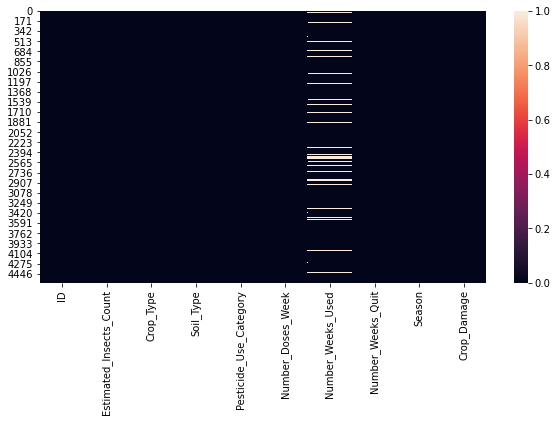

In [305]:
#Check null in visual formate
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull())

In [306]:
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [307]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


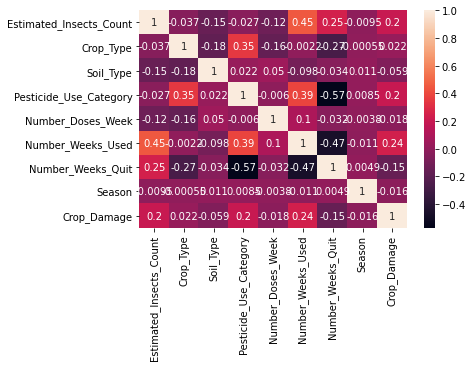

In [308]:
#check cprrelation
sns.heatmap(df.corr(),annot=True)

In [309]:
# so now we will handle null values.

In [310]:
from sklearn.impute import SimpleImputer

In [311]:
si=SimpleImputer(strategy='mean')

In [312]:
df["Number_Weeks_Used"]=si.fit_transform(df["Number_Weeks_Used"].values.reshape(-1,1))

In [313]:
#check null again
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

In [314]:
#check unique values in all columns
df["Crop_Type"].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

Observation:We can see there are 2 types in crop_type columns

In [315]:
df["Season"].value_counts()

2    2327
1    1379
3     893
Name: Season, dtype: int64

observation:we can see there are 3 types of seasons.

In [316]:
df["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

Observation:We can see 3 types in crop_damage

In [317]:
df["Soil_Type"].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

In [318]:
df["Pesticide_Use_Category"].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

# Analysis

In [319]:
# univariate and bivariate analysis

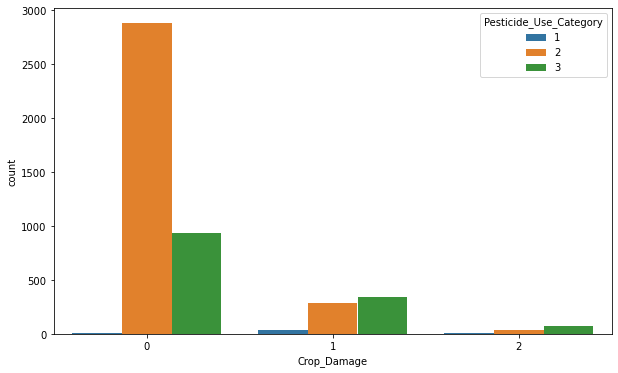

In [320]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Damage',data=df,hue='Pesticide_Use_Category')
plt.show()

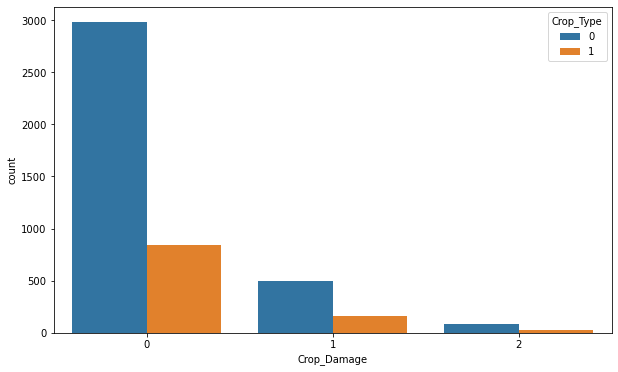

In [321]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Damage',data=df,hue='Crop_Type')
plt.show()

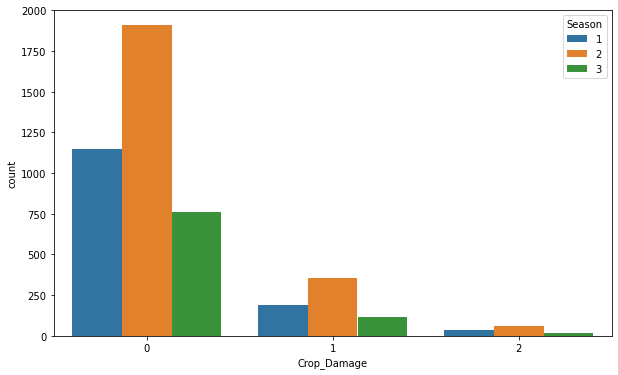

In [322]:
plt.figure(figsize=(10,6))
sns.countplot(x='Crop_Damage',data=df,hue='Season')
plt.show()

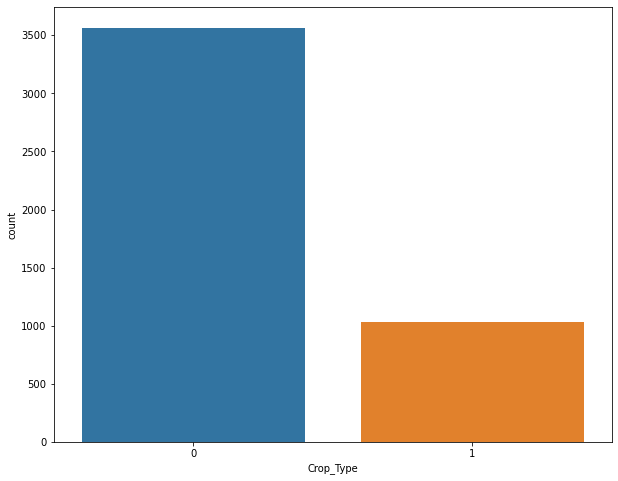

In [323]:
plt.figure(figsize = (10,8))
sns.countplot(df.Crop_Type)

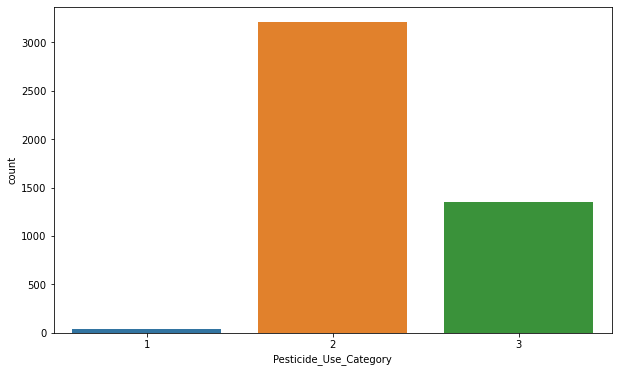

In [324]:
plt.figure(figsize=(10,6))
sns.countplot(df.Pesticide_Use_Category)

Observation: type 2 pesticide is used more followed by 3 and then 1

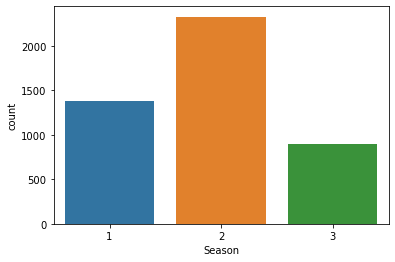

In [325]:
sns.countplot(df.Season)

Observation: type 2 season has occured more.

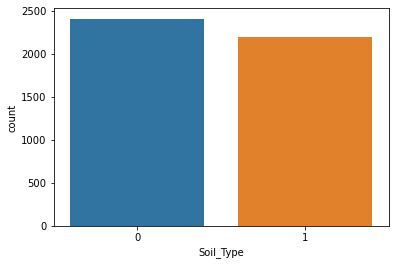

In [326]:
sns.countplot(df.Soil_Type)

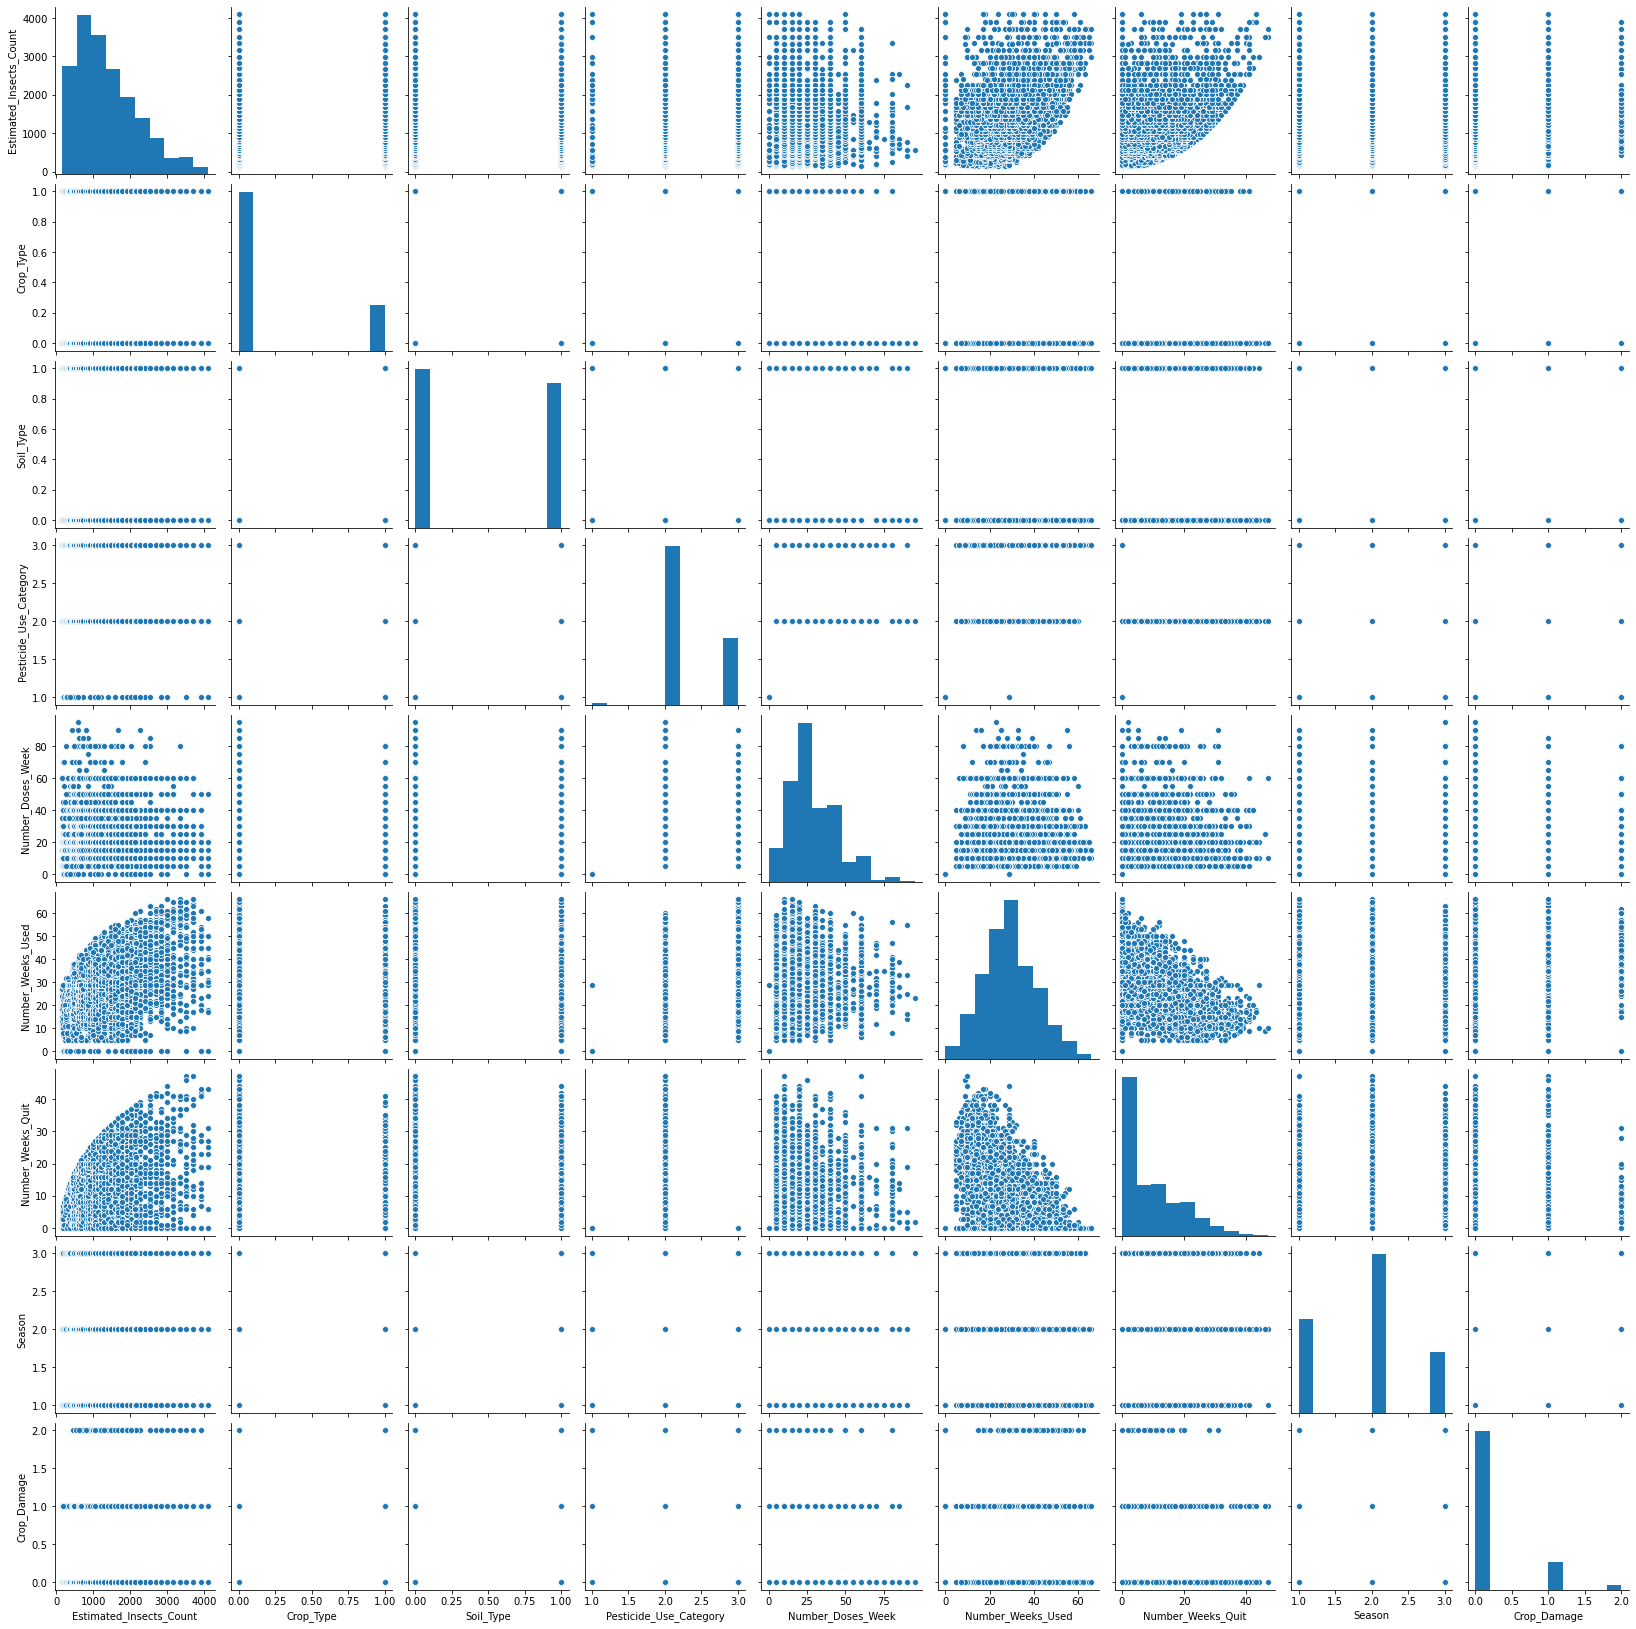

In [327]:
# ploting graph of whole data
sns.pairplot(df)

Estimated_Insects_Count       AxesSubplot(0.125,0.749828;0.133621x0.130172)
Crop_Type                  AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Soil_Type                   AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Pesticide_Use_Category     AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Number_Doses_Week          AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Number_Weeks_Used             AxesSubplot(0.125,0.593621;0.133621x0.130172)
Number_Weeks_Quit          AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Season                      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Crop_Damage                AxesSubplot(0.606034,0.593621;0.133621x0.130172)
dtype: object

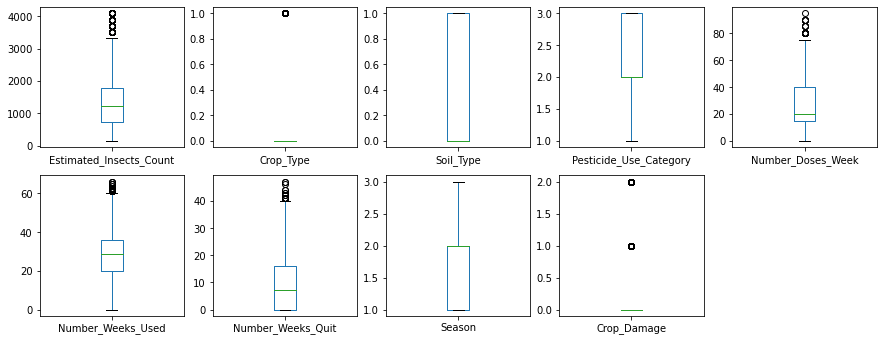

In [328]:
#Checking Outliers
df.plot(kind='box',subplots=True,layout=(5,5),figsize=(15,15),fontsize=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000029C9E370>,
      dtype=object)

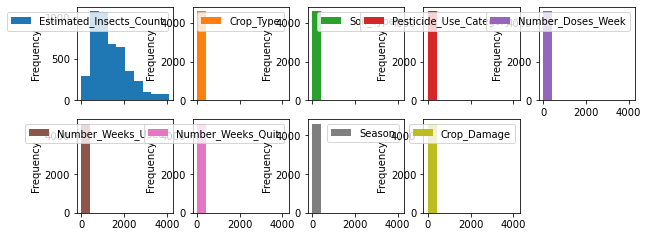

In [329]:
# ploting hist of each data
df.plot(kind='hist',subplots=True,layout=(5,5),figsize=(10,10))

In [330]:
#Now we will drop some columns which are not required
df.drop("ID",axis=1,inplace=True)

In [331]:
df.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1


In [332]:
x=df["Crop_Damage"]
y=df.drop("Crop_Damage",axis=1)
print(x.shape)
print(y.shape)

(4599,)
(4599, 8)


# Removing Outliers

In [333]:
from scipy.stats import zscore

In [334]:
z=np.abs(zscore(df))

In [335]:
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [336]:
threshold=3

In [337]:
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [338]:
df.shape

(4599, 9)

In [339]:
zs=zscore(df)
df=df[((zs<3) & (zs>-3)).all(axis=1)]

In [340]:
df.shape

(4370, 9)

In [341]:
#checking skewness
df.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [342]:
#removing skweness
for x in df.columns.drop('Crop_Damage'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x].values.reshape(-1,1))

C:\Users\admin\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [343]:
df.skew()

Estimated_Insects_Count   -0.543203
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.518158
Number_Doses_Week         -1.181035
Number_Weeks_Used          0.275330
Number_Weeks_Quit         -0.234282
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [344]:
#making data for testing and training
y=df["Crop_Damage"]
x=df.drop("Crop_Damage",axis=1)
print(x.shape)
print(y.shape)

(4370, 8)
(4370,)


In [345]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc,roc_curve,roc_auc_score,accuracy_score,classification_report,confusion_matrix,mean_absolute_error,mean_squared_error

In [346]:
#fitting the model
ss=StandardScaler()

In [347]:
x=pd.DataFrame(ss.fit_transform(x))

In [348]:
x

,0,1,2,3,4,5,6,7
0,-2.695817,1.848947,-0.960945,-3.535757,-4.818909,-2.445679,-1.298139,-1.288559
1,-2.534195,1.848947,-0.960945,-3.535757,-4.818909,-2.445679,-1.298139,0.147555
2,-2.218420,1.848947,-0.960945,-3.535757,-4.818909,-2.445679,-1.298139,0.147555
3,-2.218420,1.848947,1.040642,-3.535757,-4.818909,-2.445679,-1.298139,0.147555
4,-1.781584,1.848947,-0.960945,-3.535757,-4.818909,-2.445679,-1.298139,0.147555
...,...,...,...,...,...,...,...,...
4365,1.026175,-0.540848,1.040642,-0.573432,-0.119103,0.023356,-0.759935,-1.288559
4366,1.026892,-0.540848,1.040642,-0.573432,0.482111,1.570954,-0.445105,-1.288559
4367,1.116005,-0.540848,1.040642,-0.573432,-1.117296,-1.847457,1.289201,0.147555
4368,1.116005,-0.540848,1.040642,-0.573432,-1.117296,-0.736473,1.201206,0.147555


In [349]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=42)

In [350]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3408, 8)
(3408,)
(962, 8)
(962,)


In [351]:
lr=LogisticRegression()
lr

LogisticRegression()

In [352]:
print('Logistic Regression')
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test, predlr))
print('Mean squared error:', mean_squared_error(y_test, predlr))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, predlr)))

Logistic Regression
Accuracy_score 0.8482328482328483
[[809  16]
 [130   7]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       825
           1       0.30      0.05      0.09       137

    accuracy                           0.85       962
   macro avg       0.58      0.52      0.50       962
weighted avg       0.78      0.85      0.80       962

Mean absolute error: 0.15176715176715178
Mean squared error: 0.15176715176715178
Root Mean squared error: 0.3895730377825855


In [353]:
dtc=DecisionTreeClassifier()
print('Decision Tree Classifier')
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))
print('Mean absolute error:', mean_absolute_error(y_test, preddtc))
print('Mean squared error:', mean_squared_error(y_test, preddtc))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, preddtc)))

Decision Tree Classifier
Accuracy_score 0.7910602910602911
[[716 109]
 [ 92  45]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       825
           1       0.29      0.33      0.31       137

    accuracy                           0.79       962
   macro avg       0.59      0.60      0.59       962
weighted avg       0.80      0.79      0.80       962

Mean absolute error: 0.20893970893970895
Mean squared error: 0.20893970893970895
Root Mean squared error: 0.4570992331427706


In [354]:
kn=KNeighborsClassifier()
print('KNeighborsClassifier')
kn.fit(x_test,y_test)
predkn=kn.predict(x_test)
print('Accuracy score',accuracy_score(y_test,predkn))
print(confusion_matrix(y_test,predkn))

print(classification_report(y_test,predkn))
print('Mean absolute error:', mean_absolute_error(y_test, predkn))
print('Mean squared error:', mean_squared_error(y_test, predkn))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, predkn)))

KNeighborsClassifier
Accuracy score 0.8762993762993763
[[809  16]
 [103  34]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       825
           1       0.68      0.25      0.36       137

    accuracy                           0.88       962
   macro avg       0.78      0.61      0.65       962
weighted avg       0.86      0.88      0.85       962

Mean absolute error: 0.12370062370062371
Mean squared error: 0.12370062370062371
Root Mean squared error: 0.35171099456887


In [355]:
g=GaussianNB()
print('GaussianNB')
g.fit(x_train,y_train)
predg=g.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))
print('Mean absolute error:', mean_absolute_error(y_test, predg))
print('Mean squared error:', mean_squared_error(y_test, predg))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, predg)))

GaussianNB
Accuracy_score 0.816008316008316
[[744  81]
 [ 96  41]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       825
           1       0.34      0.30      0.32       137

    accuracy                           0.82       962
   macro avg       0.61      0.60      0.61       962
weighted avg       0.81      0.82      0.81       962

Mean absolute error: 0.183991683991684
Mean squared error: 0.183991683991684
Root Mean squared error: 0.42894251828384183


In [356]:
s=SVC()
print('SVC')
s.fit(x_train,y_train)
preds=s.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,preds))
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test, preds))
print('Mean squared error:', mean_squared_error(y_test, preds))
print('Root Mean squared error:', np.sqrt(mean_squared_error(y_test, preds)))

SVC
Accuracy_score 0.8555093555093555
[[813  12]
 [127  10]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       825
           1       0.45      0.07      0.13       137

    accuracy                           0.86       962
   macro avg       0.66      0.53      0.52       962
weighted avg       0.81      0.86      0.81       962

Mean absolute error: 0.1444906444906445
Mean squared error: 0.1444906444906445
Root Mean squared error: 0.38011925035525956


In [357]:
# ploting Auc And Roc curve for KNN
y_pred_prob=kn.predict_proba(x_test)[:,1]

In [358]:
y_pred_prob

array([0. , 0. , 0.4, 0.2, 0. , 0. , 0.2, 0.4, 0. , 0.4, 0.2, 0. , 0.4,
       0.2, 0.2, 0. , 0. , 0.4, 0.2, 0. , 0.2, 0.4, 0. , 0.2, 0. , 0. ,
       0.4, 0.2, 0. , 1. , 0. , 0.2, 0. , 0. , 0.2, 0.2, 0. , 0. , 0. ,
       0.2, 0.4, 0. , 0.2, 0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0.2, 0.4,
       0. , 0.2, 0.6, 0. , 0.2, 0.4, 0. , 0.4, 0. , 0.2, 0.2, 0.6, 0.4,
       0. , 0.2, 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0.2,
       0.2, 0. , 0.2, 0.6, 0. , 0.6, 0.6, 0.2, 0.2, 0. , 0. , 0. , 0. ,
       0. , 0.4, 0.6, 0. , 0.4, 0. , 0. , 0.2, 0.4, 0. , 0.2, 0.2, 0. ,
       0.2, 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0.4, 0.8, 0.2, 0.2, 0.4, 0.2,
       0.4, 0. , 0. , 0.2, 0. , 0.2, 0.2, 0.4, 0.4, 0.2, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0. , 0.2, 0. , 0.4, 0.4, 0.4,
       0. , 0. , 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2, 0.4, 0.4,
       0. , 0.2, 0.6, 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.2, 0.2,
       0. , 0.2, 0.2, 0.2, 0.4, 0. , 0.4, 0. , 0.2, 0. , 0. , 0.

In [359]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [360]:
fpr

array([0.        , 0.        , 0.00363636, 0.01939394, 0.11636364,
       0.37818182, 1.        ])

In [361]:
tpr

array([0.        , 0.04379562, 0.08759124, 0.24817518, 0.57664234,
       1.        , 1.        ])

In [362]:
threshold

array([2. , 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

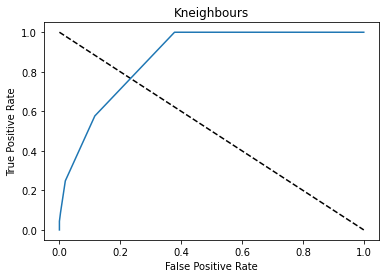

In [363]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label="KNegihbours")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Kneighbours")
plt.show()

In [364]:
# test the same model on our test instance

In [365]:
df_test=pd.read_csv("Agri_test.csv")
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [366]:
# drop ID
df_test.drop("ID",axis=1,inplace=True)

In [367]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1080 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [368]:
df_test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [369]:
#filling null values
df_test["Number_Weeks_Used"]=si.fit_transform(df_test["Number_Weeks_Used"].values.reshape(-1,1))

In [370]:
df_test.isnull().sum()

Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [371]:
df_test=ss.fit_transform(df_test)

In [372]:
predict_test=kn.predict(df_test)

In [373]:
predict_test_df=pd.DataFrame(pd.Series(predict_test))

In [374]:
predict_test_df.columns=['predicted values test']

In [375]:
predict_test_df['predicted values test'].value_counts()

0    1111
1      88
Name: predicted values test, dtype: int64

In [376]:
joblib.dump(kn,'Agriculture Dataset SVC.obj')

['Agriculture Dataset SVC.obj']